<a href="https://colab.research.google.com/github/danish-khan962/Deep-Learning/blob/main/02_Neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Regression With Tensorflow**

| Hyperparameter | Typical Values |
|---|---|
| **Input Layer Shape** | Same shape as number of features (e.g. 3 for #bedrooms, #bathrooms, #car spaces in housing price prediction |
| Hidden Layers | Problem specific, minimum=1, maximum=unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually `ReLU`(rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss Function | `MSE`(mean squared error) or `MAE`(mean absolute error)/`Huber`(combination of MAE/MSE) if outliers |
| Optimizer | `SGD`(stochastic gradient descent), `Adam` |



# **Introduction to Regression with Neural Networks in TensorFlow**

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, evern shorter.... predicting a number

In [ ]:
# Importing tensorflow
import tensorflow as tf
print("Tensorflow version we're using: ", tf.__version__)

## Creating data to view and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
X + 10

In [ ]:
y == X + 10  # This is the relationship between our dependent variable(y) and independent variable(x)

## Input and Output shapes

In [ ]:
# Create a tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant(654332)
house_info, house_price

##### From this above house price cell we know about the shapes of both features and labels. Here `house_info` is our feature deriving the `house_price` which is our label our output we can say.

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

In [ ]:
X[0], y[0]

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

In [ ]:
plt.figure(figsize=(9,4))
plt.scatter(X,y)

## Steps in modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the functio which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)


In [ ]:
# set random_seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)

In [ ]:
# Check out X and y
X, y

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict(tf.constant([11.0]))
y_pred

## Improving our model

As we can above that from the above pattern at [11.0] our model predicted value should be 21....  but it is not giving exactly what we want.
Hence, it's time to improve our model.


We can improve our model, by altering the steps we took to create a model.

1. `Creating a model` - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. `Compiling a model` - here we might change the optimzation function or perhaps the **learning rate** of the optimzation function.
3. `Fitting a model` - here we might fit a model for more **epochs** (leave it training for lomger) or on more data (give the model more examples to learn from).

In [37]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the mode (this time we'll train for the longer time)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - loss: 11.8003 - mae: 11.8003
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.7156 - mae: 11.7156
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 11.6309 - mae: 11.6309
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.5462 - mae: 11.5462
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.4614 - mae: 11.4614
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 11.3767 - mae: 11.3767
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 11.2920 - mae: 11.2920
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 11.2073 - mae: 11.2073
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 11.1225 - mae: 11.1225
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 11.0378 - mae: 11.0378
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 10.9531 - mae: 10.9531
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 10.8684 - mae: 10.8684
Epoch 13/100
1/1 ━━━

In [38]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [39]:
# Let's see if our model's prediction has improved
model.predict(tf.constant([11.0]))  # Now we should get output close to 21

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[1.1160007]], dtype=float32)

In [40]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y , epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step - loss: 10.3243 - mae: 10.3243
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 10.0839 - mae: 10.0839
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 9.8442 - mae: 9.8442
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.6039 - mae: 9.6039
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.3664 - mae: 9.3664
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 9.1246 - mae: 9.1246
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.8838 - mae: 8.8838
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.6409 - mae: 8.6409
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.4689 - mae: 8.4689
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.3144 - mae: 8.3144
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.1582 - mae: 8.1582
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.9991 - mae: 7.9991
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47m

In [41]:
X, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [42]:
# Let's predict now
model.predict(tf.constant([11.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[25.552105]], dtype=float32)

## Evaluating a model


In practice, a typical workflow you'll go through when building a neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it-> tweak a model -> fit it -> evaluate it....
```

When it comes to evaluation.... there are 3 words you should memorize:
> "Visualize, Visualize, Visualize"


It's good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predicitons of a model line up against the ground truth(the original labels)?

In [43]:
# Make a bigger dataset
X = tf.range(-200, 200, 5) # from -200 to 200 with a step of 5
X

<tf.Tensor: shape=(80,), dtype=int32, numpy=
array([-200, -195, -190, -185, -180, -175, -170, -165, -160, -155, -150,
       -145, -140, -135, -130, -125, -120, -115, -110, -105, -100,  -95,
        -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,  -45,  -40,
        -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,   10,   15,
         20,   25,   30,   35,   40,   45,   50,   55,   60,   65,   70,
         75,   80,   85,   90,   95,  100,  105,  110,  115,  120,  125,
        130,  135,  140,  145,  150,  155,  160,  165,  170,  175,  180,
        185,  190,  195], dtype=int32)>

In [44]:
# Make labels for the data
y = X + 10
y

<tf.Tensor: shape=(80,), dtype=int32, numpy=
array([-190, -185, -180, -175, -170, -165, -160, -155, -150, -145, -140,
       -135, -130, -125, -120, -115, -110, -105, -100,  -95,  -90,  -85,
        -80,  -75,  -70,  -65,  -60,  -55,  -50,  -45,  -40,  -35,  -30,
        -25,  -20,  -15,  -10,   -5,    0,    5,   10,   15,   20,   25,
         30,   35,   40,   45,   50,   55,   60,   65,   70,   75,   80,
         85,   90,   95,  100,  105,  110,  115,  120,  125,  130,  135,
        140,  145,  150,  155,  160,  165,  170,  175,  180,  185,  190,
        195,  200,  205], dtype=int32)>

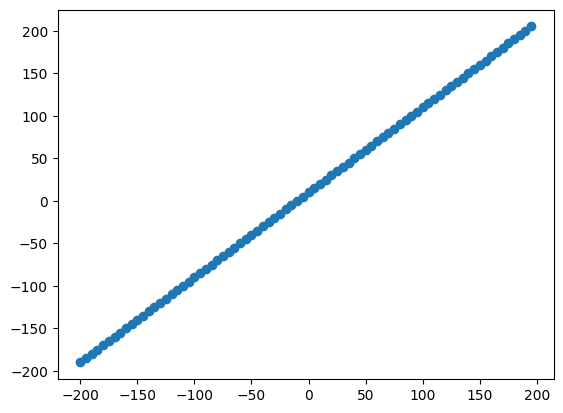

In [45]:
# Visualize the data
plt.scatter(X, y)

 ### The 3 sets..

 * **Traning set** - the model learns from this data, which is typically 70-80% of the total data you have available.
 * **Validation set** - The model gets tuned on this data, which is typically 10-15% of the data available.
 * **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total available data.

In [48]:
# Check the length of how many samples we have
len(X)

80

In [50]:
# Splitting the data into train and test sets
X_train =  X[:60]
y_train = y[:60]

X_test = X[60:]
y_test = y[60:]

len(X_train), len(X_test), len(y_train), len(y_test)

(60, 20, 60, 20)

### Visualizing the data

Now we've got out data in training and test sets... let's visualize it again!

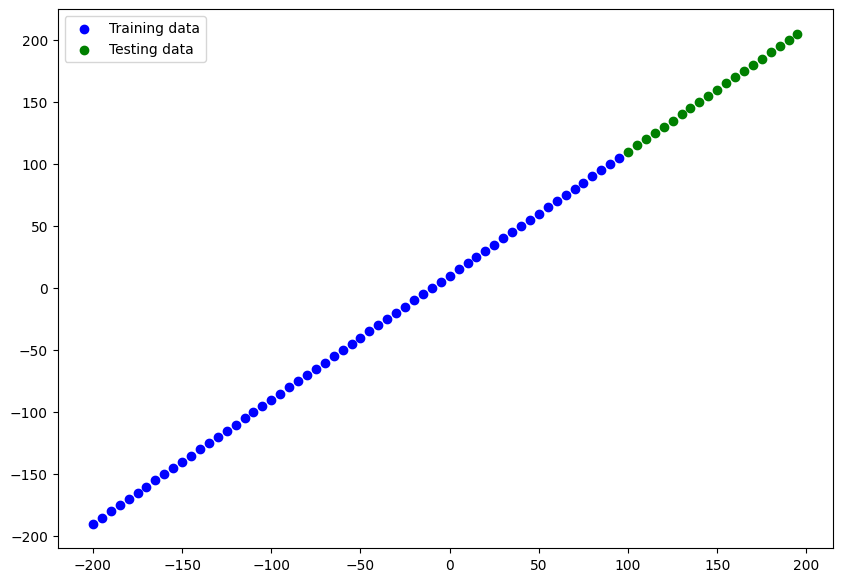

In [52]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given X what's y?)
plt.legend()

In [53]:
# Let's have a look at how to build a neural network for our data

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [54]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Let's create a model which builds automatically by defining the input_shape into first layer
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2, Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parans**- these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [58]:
# Let's fit our model to training data
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 38.4425 - mae: 38.4425
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 38.5367 - mae: 38.5367
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 37.4512 - mae: 37.4512
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 37.5449 - mae: 37.5449
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 37.6387 - mae: 37.6387
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 37.7324 - mae: 37.7324
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 37.8262 - mae: 37.8262
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 37.9199 - mae: 37.9199
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 38.0137 - mae: 38.0137
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 38.1075 - mae: 38.1075
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 38.2012 - mae: 38.2012
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 38.2950 - mae: 38.2950
Epoch 13/100
2/2 ━━━━━━━━